In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GEIAAIKQEIAAIKKEIAAIKWEIAAIKQGYG', 'GEIAAIKQEIAAIKKEIAAIKWEIAAIKQGYG', 'GEIAAIKQEIAAIKKEIAAIKWEIAAIKQGYG', 
             'GEIAAIKQEIAAIKKEIAAIKWEIAAIKQGYG']

In [7]:
parameters = [
    Parameter.static('Oligomeric State', 4),
    Parameter.static('Helix Length', 32),
    Parameter.dynamic('Radius', 8.0, 1.0),
    Parameter.dynamic('Pitch', 230, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['f'], 27),  
]

In [8]:
default_values = [x.default_value for x in parameters]
print(default_values)

[4, 32, 8.0, 230, 154.2]


In [9]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [10]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [11]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	65   	-1936.91	169.996	-2182.85	-1531.46
1  	56   	-2059.2 	79.5132	-2187.34	-1883.83
2  	72   	-2125.69	43.4619	-2194.66	-2049.98
3  	67   	-2161.97	17.8446	-2194.66	-2117.8 
4  	59   	-2172.99	9.90015	-2194.66	-2153.71
5  	61   	-2180.07	6.33709	-2195.95	-2167.61
6  	67   	-2185   	4.19615	-2195.95	-2177.42
7  	71   	-2188.66	3.24296	-2195.95	-2183.31
8  	66   	-2191.95	2.6132 	-2196.08	-2187.85
9  	62   	-2193.94	1.73483	-2196.12	-2190.42
10 	75   	-2195.15	0.922761	-2196.14	-2192.62
11 	85   	-2195.89	0.19324 	-2196.36	-2195.37
12 	64   	-2196   	0.118027	-2196.39	-2195.79
13 	65   	-2196.06	0.120164	-2196.54	-2195.89
14 	68   	-2196.12	0.126509	-2196.54	-2195.97
15 	70   	-2196.21	0.125459	-2196.54	-2196.03
16 	61   	-2196.24	0.132392	-2196.71	-2196.05
17 	70   	-2196.32	0.123569	-2196.71	-2196.14
18 	67   	-2196.37	0.122205	-2196.71	-2196.17
19 	56   	-2196.45	0.117008	-2196.71	-2196.28
20 	76   	-2196.53	0.108951	-2196.74	-2196.35

In [12]:
optimized_model_ga = opt_ga.best_model

In [13]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-2196.8091473347877

In [14]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [15]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

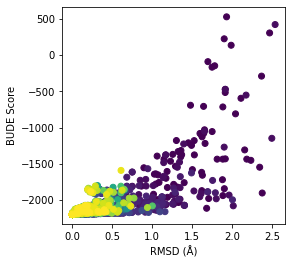

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('ga.png')

In [17]:
f = open('d_CC-Tri_tetramer-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [18]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [19]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-1780.46	292.906	-2160.91	-455.171
1  	100  	-1938.89	163.751	-2172.35	-1459.96
2  	100  	-2017.11	103.664	-2173.66	-1701.18
3  	100  	-2074.53	72.066 	-2178.09	-1811.36
4  	100  	-2096.14	55.6018	-2178.09	-1933.62
5  	100  	-2118.98	39.448 	-2178.09	-2003.56
6  	100  	-2137.74	28.1248	-2179.75	-2041.2 
7  	100  	-2149.62	21.6006	-2185.77	-2089.97
8  	100  	-2158.99	15.0429	-2185.77	-2089.97
9  	100  	-2163.46	12.3487	-2186.47	-2130.14
10 	100  	-2169.14	9.46777	-2196.4 	-2133.44
11 	100  	-2173.02	7.48069	-2196.84	-2154.75
12 	100  	-2175.91	6.61817	-2196.84	-2158.44
13 	100  	-2178.15	6.05178	-2196.84	-2161.82
14 	100  	-2180.8 	5.25286	-2196.84	-2168.44
15 	100  	-2182.62	4.51376	-2196.84	-2171.05
16 	100  	-2184.33	4.14612	-2196.84	-2171.05
17 	100  	-2185.69	3.45714	-2196.84	-2177.25
18 	100  	-2186.84	3.11846	-2196.84	-2177.29
19 	100  	-2187.72	2.72786	-2196.84	-2182.35
20 	100  	-2188.68	2.55857	-2196.84	-2183.46
21 	100  	

In [20]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-2196.8377701172662

In [21]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [22]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

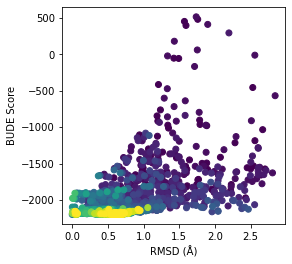

In [23]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('de.png')

In [24]:
f = open('d_CC-Tri_tetramer-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [25]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [26]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min    	max     
0  	100  	-1894.98	260.958	-2178.8	-874.488
1  	87   	-2001.23	171.436	-2181.28	-1088.89
2  	83   	-2011.63	149.382	-2177.73	-1311.67
3  	93   	-1751.75	326.596	-2152.93	-565.743
4  	98   	-1805.86	359.338	-2175.91	-565.743
5  	94   	-1894.27	278.087	-2210.47	-815.427
6  	70   	-1984.02	229.319	-2210.47	-815.427
7  	72   	-2011.37	161.042	-2210.47	-815.427
8  	68   	-2013.52	139.383	-2210.47	-1209.24
9  	77   	-1951.7 	216.349	-2185.63	-862.901
10 	83   	-1872.19	234.628	-2169.56	-1019.31
11 	94   	-1928.82	225.423	-2184.9 	-1019.31
12 	94   	-1954.37	165.612	-2166.46	-1245.75
13 	78   	-1971.67	176.653	-2173.91	-1332.59
14 	79   	-1964.27	183.513	-2192.01	-1264.06
15 	91   	-1969.99	165.361	-2176.19	-1326.42
16 	81   	-1887.04	242.884	-2161.6 	-494.565
17 	83   	-1902.8 	244.711	-2173.15	-1050.6 
18 	86   	-1952.33	221.319	-2188.66	-571.306
19 	88   	-1915.34	185.746	-2167.37	-571.306
20 	86   	-1947.89	162.016	-2183.87	-1373.4 
21 	93   	-1

In [27]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-2210.4699681391003

In [28]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [29]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

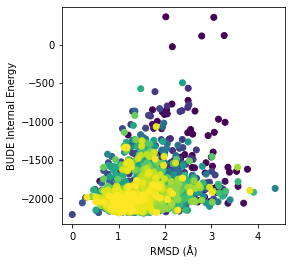

In [30]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Internal Energy')

fig.savefig('pso.png')

In [31]:
f = open('d_CC-Tri_tetramer-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [32]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [33]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-1812.63	255.208	-2136.61	-857.736
1  	100  	-2005.13	123.215	-2143.13	-1521.72
2  	100  	-2058.97	80.0266	-2147.9 	-1680.69
3  	100  	-2084.61	61.8528	-2142.08	-1894.34
4  	100  	-2099.02	49.1305	-2147.46	-2006.64
5  	100  	-2114.77	43.7565	-2150   	-1989.52
6  	100  	-2102.29	54.4391	-2148.67	-1999.29
7  	100  	-2125.92	37.8331	-2147.17	-2019.34
8  	100  	-2108.56	52.9982	-2150.93	-2009.59
9  	100  	-2114.56	51.495 	-2150.16	-2016.43
10 	100  	-2099.96	58.3648	-2149.54	-2016.7 
11 	100  	-2121.7 	46.9506	-2150.72	-2018.27
12 	100  	-2105.94	57.3439	-2151.01	-2015.06
13 	100  	-2123.98	46.893 	-2150.75	-2019.98
14 	100  	-2132.3 	39.6491	-2151.23	-2023.6 
15 	100  	-2134.02	38.7856	-2151.46	-2018.06
16 	100  	-2119.44	52.1291	-2151.55	-2016.86
17 	100  	-2126.99	47.0678	-2151.58	-2018.75
18 	100  	-2116.53	51.4487	-2151.77	-2023.7 
19 	100  	-2135.33	38.8363	-2151.85	-2020.72
20 	100  	-2137.03	34.8486	-2151.9 	-2020.49
21 	100  	

In [34]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-2152.166399066526

In [35]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [36]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

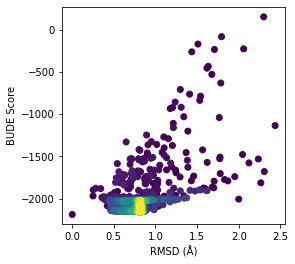

In [37]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('cmaes.png')

In [38]:
f = open('d_CC-Tri_tetramer-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)